In [1]:
import numpy as np
from tqdm import tqdm
from src.document_db import DocumentsDB
import matplotlib.pyplot as plt

random_index = np.random.randint(0, 99)
dataset_size = []
load_speed = []
preprocess_speed = []
matrix_build_speed = []
inverted_index_build_speed = []
sequential_search_speed = []
inverted_index_search_speed = []
memory_usage = []
inverted_memory_usage = [] 

search_count = 5
for i in tqdm(range(100, 7001, 500)):
    db = DocumentsDB(data_path=f"datasets/documents{i}.csv", use_inverted_index=False)
    
    search_indexes = []
    similar_docs = []
    search_speeds_sequential = []
    for _ in range(search_count):
        random_index = np.random.randint(0, len(db.full_documents) - 1)
        search_indexes.append(random_index)
        similar_documents = db.get_similar_documents(random_index, 5)
        similar_docs.extend(similar_documents)
        speed_info = db.get_speed_statistics()
        search_speeds_sequential.append(speed_info.search_speed)
    average_search_speed_sequential = sum(search_speeds_sequential) / len(search_speeds_sequential)
    
    search_speeds_inverted = []
    similar_docs_inverted = []
    db.use_inverted_index = True
    for search_index in search_indexes:
        similar_documents = db.get_similar_documents(search_index, 5)
        similar_docs_inverted.extend(similar_documents)
        speed_info = db.get_speed_statistics()
        search_speeds_inverted.append(speed_info.search_speed)
    average_search_speed_inverted = sum(search_speeds_inverted) / len(search_speeds_inverted)
    
    assert similar_docs == similar_docs_inverted
    
    speed_info = db.get_speed_statistics()        
    dataset_size.append(i)
    load_speed.append(speed_info.load_speed)
    preprocess_speed.append(speed_info.preprocess_speed)
    matrix_build_speed.append(speed_info.matrix_build_speed)
    inverted_index_build_speed.append(speed_info.inverted_index_build_speed)
    sequential_search_speed.append(average_search_speed_sequential)
    inverted_index_search_speed.append(average_search_speed_inverted)
    matrix_memory, inverted_index_memory = db.get_memory_usage()
    memory_usage.append(matrix_memory)
    inverted_memory_usage.append(inverted_index_memory)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/senyaaa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/senyaaa/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /home/senyaaa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
  0%|          | 0/14 [00:00<?, ?it/s]

Loading documents...
Loaded documents...
Preprocessing documents...


  7%|▋         | 1/14 [00:02<00:32,  2.53s/it]

Preprocessed documents...
Building tfidf matrix...
Built tfidf matrix...
Building inverted index...
Built inverted index...
Loading documents...
Loaded documents...
Preprocessing documents...
Preprocessed documents...
Building tfidf matrix...
Built tfidf matrix...
Building inverted index...


 14%|█▍        | 2/14 [00:06<00:43,  3.59s/it]

Built inverted index...
Loading documents...
Loaded documents...
Preprocessing documents...
Preprocessed documents...
Building tfidf matrix...
Built tfidf matrix...
Building inverted index...
Built inverted index...


 21%|██▏       | 3/14 [00:17<01:13,  6.70s/it]

Loading documents...
Loaded documents...
Preprocessing documents...
Preprocessed documents...
Building tfidf matrix...
Built tfidf matrix...
Building inverted index...
Built inverted index...


 29%|██▊       | 4/14 [00:31<01:36,  9.69s/it]

Loading documents...
Loaded documents...
Preprocessing documents...
Preprocessed documents...
Building tfidf matrix...
Built tfidf matrix...
Building inverted index...
Built inverted index...


 36%|███▌      | 5/14 [00:48<01:51, 12.41s/it]

Loading documents...
Loaded documents...
Preprocessing documents...
Preprocessed documents...
Building tfidf matrix...
Built tfidf matrix...
Building inverted index...
Built inverted index...


 43%|████▎     | 6/14 [01:11<02:07, 15.96s/it]

Loading documents...
Loaded documents...
Preprocessing documents...
Preprocessed documents...
Building tfidf matrix...
Built tfidf matrix...
Building inverted index...
Built inverted index...


 50%|█████     | 7/14 [01:38<02:16, 19.55s/it]

Loading documents...
Loaded documents...
Preprocessing documents...
Preprocessed documents...
Building tfidf matrix...
Built tfidf matrix...
Building inverted index...
Built inverted index...


 57%|█████▋    | 8/14 [02:09<02:18, 23.17s/it]

Loading documents...
Loaded documents...
Preprocessing documents...
Preprocessed documents...
Building tfidf matrix...
Built tfidf matrix...
Building inverted index...
Built inverted index...


 64%|██████▍   | 9/14 [02:44<02:14, 26.83s/it]

Loading documents...
Loaded documents...
Preprocessing documents...
Preprocessed documents...
Building tfidf matrix...
Built tfidf matrix...
Building inverted index...
Built inverted index...


 71%|███████▏  | 10/14 [03:22<02:00, 30.25s/it]

Loading documents...
Loaded documents...
Preprocessing documents...
Preprocessed documents...
Building tfidf matrix...
Built tfidf matrix...
Building inverted index...
Built inverted index...


 79%|███████▊  | 11/14 [04:08<01:45, 35.01s/it]

Loading documents...
Loaded documents...
Preprocessing documents...
Preprocessed documents...
Building tfidf matrix...
Built tfidf matrix...
Building inverted index...
Built inverted index...


 86%|████████▌ | 12/14 [04:58<01:19, 39.85s/it]

Loading documents...
Loaded documents...
Preprocessing documents...
Preprocessed documents...
Building tfidf matrix...
Built tfidf matrix...
Building inverted index...
Built inverted index...


 93%|█████████▎| 13/14 [05:54<00:44, 44.50s/it]

Loading documents...
Loaded documents...
Preprocessing documents...
Preprocessed documents...
Building tfidf matrix...
Built tfidf matrix...
Building inverted index...
Built inverted index...


100%|██████████| 14/14 [06:53<00:00, 29.52s/it]


In [2]:
for i in tqdm(range(10000, 12501, 500)):
    db = DocumentsDB(data_path=f"datasets/documents{i}.csv", use_inverted_index=False)
    
    search_indexes = []
    search_speeds_sequential = []
    for _ in range(search_count):
        random_index = np.random.randint(0, len(db.full_documents) - 1)
        search_indexes.append(random_index)
        similar_documents = db.get_similar_documents(random_index, 5)
        speed_info = db.get_speed_statistics()
        search_speeds_sequential.append(speed_info.search_speed)
    average_search_speed_sequential = sum(search_speeds_sequential) / len(search_speeds_sequential)
    
    search_speeds_inverted = []
    db.use_inverted_index = True
    for search_index in search_indexes:
        similar_documents = db.get_similar_documents(search_index, 5)
        speed_info = db.get_speed_statistics()
        search_speeds_inverted.append(speed_info.search_speed)
    average_search_speed_inverted = sum(search_speeds_inverted) / len(search_speeds_inverted)
    
    dataset_size.append(i)
    load_speed.append(speed_info.load_speed)
    preprocess_speed.append(speed_info.preprocess_speed)
    matrix_build_speed.append(speed_info.matrix_build_speed)
    inverted_index_build_speed.append(speed_info.inverted_index_build_speed)
    sequential_search_speed.append(average_search_speed_sequential)
    inverted_index_search_speed.append(average_search_speed_inverted)
    matrix_memory, inverted_index_memory = db.get_memory_usage()
    memory_usage.append(matrix_memory)
    inverted_memory_usage.append(inverted_index_memory)

  0%|          | 0/6 [00:00<?, ?it/s]

Loading documents...
Loaded documents...
Preprocessing documents...
Preprocessed documents...
Building tfidf matrix...
Built tfidf matrix...
Building inverted index...
Built inverted index...


 17%|█▋        | 1/6 [01:26<07:10, 86.09s/it]

Loading documents...
Loaded documents...
Preprocessing documents...
Preprocessed documents...
Building tfidf matrix...
Built tfidf matrix...
Building inverted index...
Built inverted index...


 33%|███▎      | 2/6 [02:55<05:52, 88.20s/it]

Loading documents...
Loaded documents...
Preprocessing documents...
Preprocessed documents...
Building tfidf matrix...
Built tfidf matrix...
Building inverted index...
Built inverted index...


 50%|█████     | 3/6 [04:29<04:32, 90.77s/it]

Loading documents...
Loaded documents...
Preprocessing documents...
Preprocessed documents...
Building tfidf matrix...
Built tfidf matrix...
Building inverted index...
Built inverted index...


 67%|██████▋   | 4/6 [06:11<03:10, 95.11s/it]

Loading documents...
Loaded documents...
Preprocessing documents...
Preprocessed documents...
Building tfidf matrix...
Built tfidf matrix...
Building inverted index...
Built inverted index...


 83%|████████▎ | 5/6 [07:54<01:38, 98.12s/it]

Loading documents...
Loaded documents...
Preprocessing documents...
Preprocessed documents...
Building tfidf matrix...
Built tfidf matrix...
Building inverted index...
Built inverted index...


100%|██████████| 6/6 [09:44<00:00, 97.48s/it] 


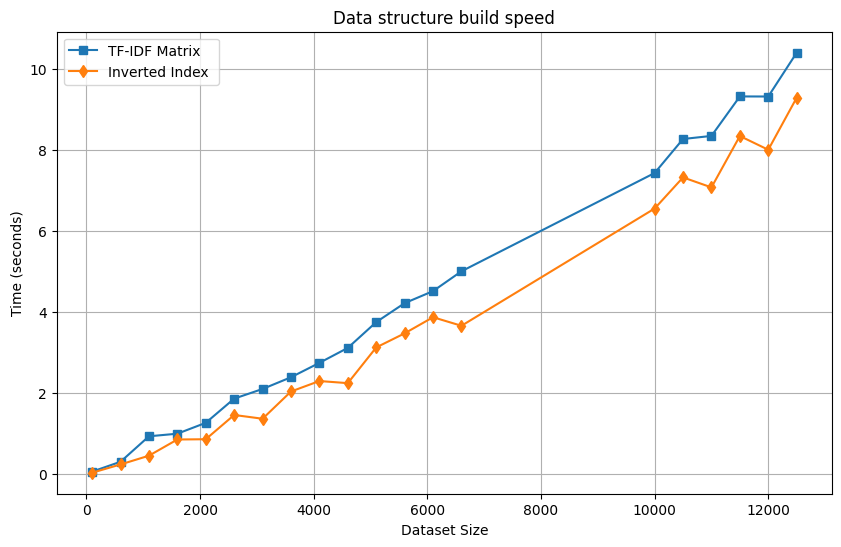

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(dataset_size, matrix_build_speed, label="TF-IDF Matrix", marker="s")
plt.plot(dataset_size, inverted_index_build_speed, label="Inverted Index ", marker="d")

plt.xlabel("Dataset Size")
plt.ylabel("Time (seconds)")
plt.title("Data structure build speed")
plt.legend()
plt.grid(True)

plt.show()

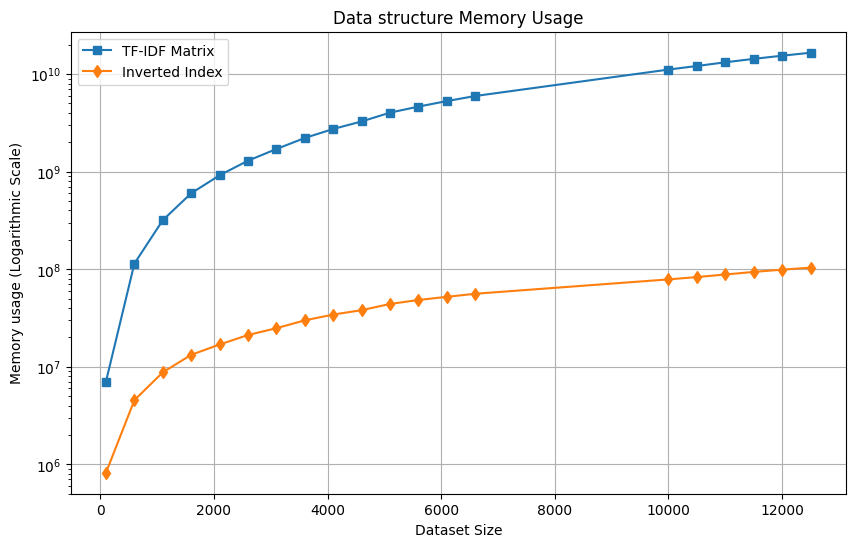

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(dataset_size, memory_usage, label="TF-IDF Matrix", marker="s")
plt.plot(dataset_size, inverted_memory_usage, label="Inverted Index", marker="d")

plt.yscale("log")

plt.xlabel("Dataset Size")
plt.ylabel("Memory usage (Logarithmic Scale)")
plt.title("Data structure Memory Usage")
plt.legend()
plt.grid(True)

plt.show()

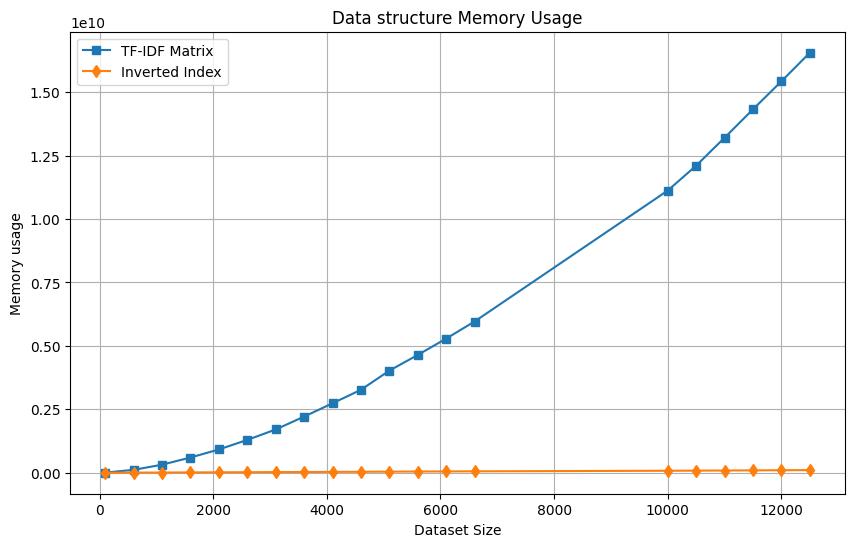

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(dataset_size, memory_usage, label="TF-IDF Matrix", marker="s")
plt.plot(dataset_size, inverted_memory_usage, label="Inverted Index", marker="d")

plt.xlabel("Dataset Size")
plt.ylabel("Memory usage")
plt.title("Data structure Memory Usage")
plt.legend()
plt.grid(True)

plt.show()

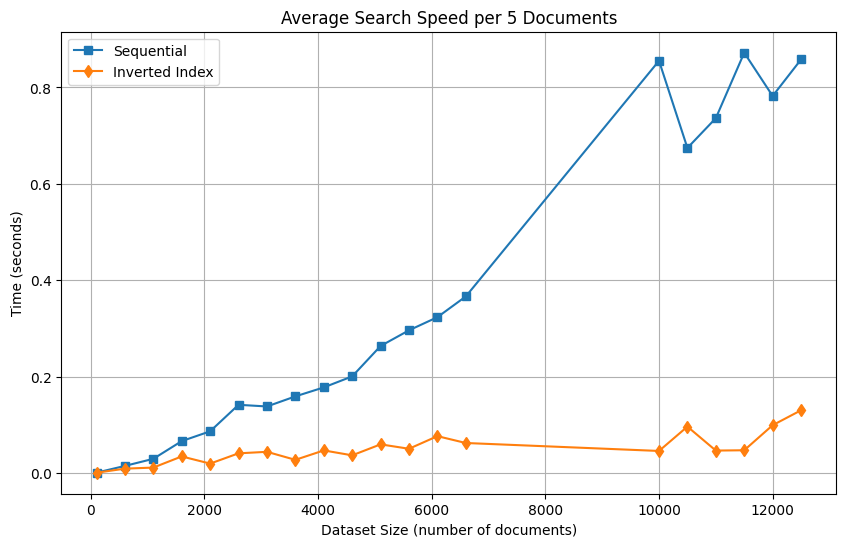

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(dataset_size, sequential_search_speed, label="Sequential", marker="s")
plt.plot(dataset_size, inverted_index_search_speed, label="Inverted Index", marker="d")

plt.xlabel("Dataset Size (number of documents)")
plt.ylabel("Time (seconds)")
plt.title("Average Search Speed per 5 Documents")
plt.legend()
plt.grid(True)

plt.show()

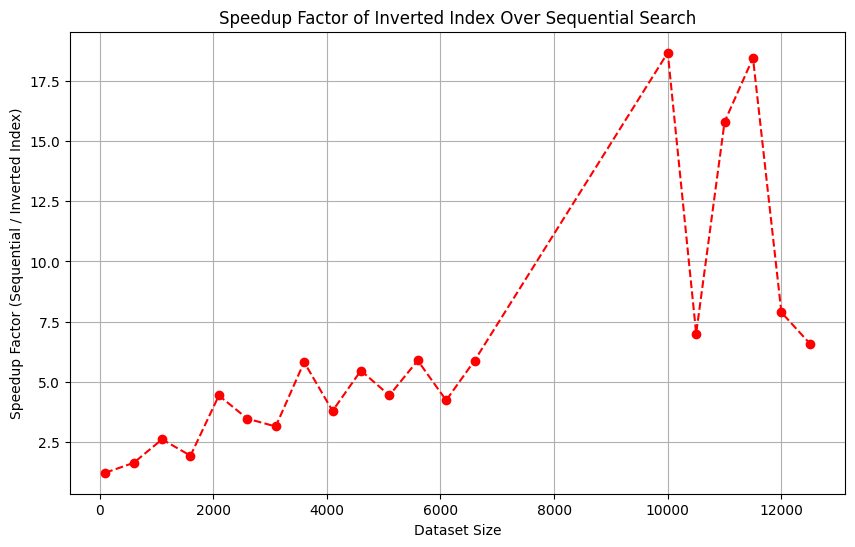

In [6]:
speedup = [seq / inv for seq, inv in zip(sequential_search_speed, inverted_index_search_speed)]

plt.figure(figsize=(10, 6))
plt.plot(dataset_size, speedup, marker="o", linestyle="--", color="red")

plt.xlabel("Dataset Size")
plt.ylabel("Speedup Factor (Sequential / Inverted Index)")
plt.title("Speedup Factor of Inverted Index Over Sequential Search")
plt.grid(True)

plt.show()

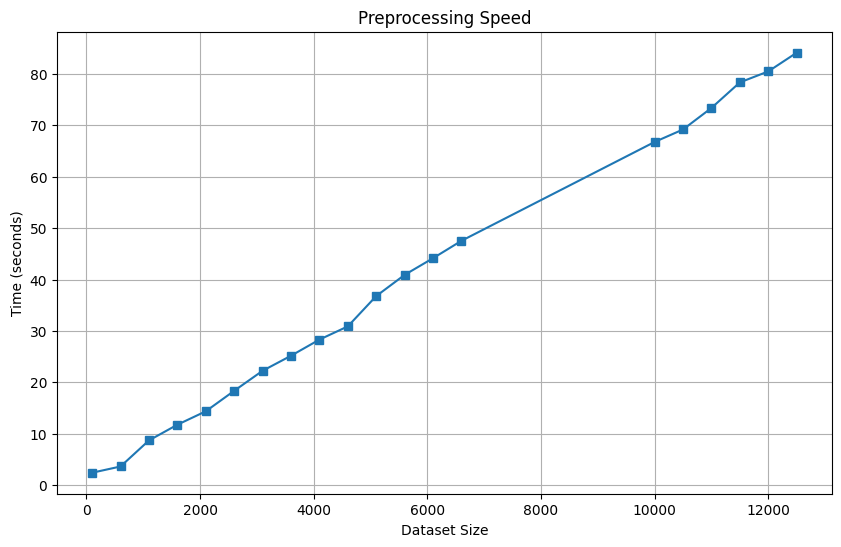

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(dataset_size, preprocess_speed, label="Preprocessing Speed", marker="s")

plt.xlabel("Dataset Size")
plt.ylabel("Time (seconds)")
plt.title("Preprocessing Speed")
plt.grid(True)

plt.show()